# 

In [1]:
import os, sys
import numpy as np

In [2]:
def startwith(start: int, mgraph: list) -> list:
    passed = [start]
    nopass = [x for x in range(len(mgraph)) if x != start]
    dis = mgraph[start]
    
    while len(nopass):
        idx = nopass[0]
        for i in nopass:
            if dis[i] < dis[idx]: idx = i

        nopass.remove(idx)
        passed.append(idx)

        for i in nopass:
            if dis[idx] + mgraph[idx][i] < dis[i]: dis[i] = dis[idx] + mgraph[idx][i]
    return dis


if __name__ == "__main__":
    inf = 10086
    mgraph = [[0, 1, 12, inf, inf, inf],
              [inf, 0, 9, 3, inf, inf],
              [inf, inf, 0, inf, 5, inf],
              [inf, inf, 4, 0, 13, 15],
              [inf, inf, inf ,inf, 0, 4],
              [inf, inf, inf, inf ,inf, 0]]

    dis = startwith(0, mgraph)
    print(dis)

[0, 1, 8, 4, 13, 17]


In [11]:
# -*- coding: utf-8 -*-  
## 表示无穷大  
INF = 9999  
  
class Dijkstra_Path():  
    def __init__(self, node_map):  
        self.node_map = node_map  
        self.node_length = len(node_map)  
        self.used_node_list = []  
        self.collected_node_dict = {}  
        print(f'[Dijkstra_Path][__init__]  node_map: {node_map}')
      
    def __call__(self, from_node, to_node):  
        self.from_node = from_node  
        self.to_node = to_node  
        self._init_dijkstra()  
        return self._format_path()  
  
    def _init_dijkstra(self):  
        ## Add from_node to used_node_list  
        self.used_node_list.append(self.from_node)  
        for index1 in range(self.node_length):  
            self.collected_node_dict[index1] = [INF, -1]  
        print(f'[Dijkstra_Path][_init_dijkstra]  used_node_list: {self.used_node_list}')
        print(f'[Dijkstra_Path][_init_dijkstra]  collected_node_dict: {self.collected_node_dict}')
    
        self.collected_node_dict[self.from_node] = [0, -1] # from_node don't have pre_node  
        for index1, weight_val in enumerate(self.node_map[self.from_node]):  
            if weight_val:  
                self.collected_node_dict[index1] = [weight_val, self.from_node] # [weight_val, pre_node]  
        print(f'[Dijkstra_Path][_init_dijkstra]  collected_node_dict: {self.collected_node_dict}')
          
        self._foreach_dijkstra()  
      
    def _foreach_dijkstra(self):  
        while(len(self.used_node_list) < self.node_length - 1):  
            min_key = -1  
            min_val = INF  
            for key, val in self.collected_node_dict.items(): # 遍历已有权值节点  
                if val[0] < min_val and key not in self.used_node_list:  
                    min_key = key  
                    min_val = val[0]  
  
            ## 把最小的值加入到used_node_list          
            if min_key != -1:  
                self.used_node_list.append(min_key)  
  
            for index1, weight_val in enumerate(self.node_map[min_key]):  
                ## 对刚加入到used_node_list中的节点的相邻点进行遍历比较  
                if weight_val > 0 and self.collected_node_dict[index1][0] > weight_val + min_val:  
                    self.collected_node_dict[index1][0] = weight_val + min_val # update weight_val  
                    self.collected_node_dict[index1][1] = min_key  
  
  
    def _format_path(self):  
        node_list = []  
        temp_node = self.to_node  
        node_list.append((temp_node, self.collected_node_dict[temp_node][0]))  
        while self.collected_node_dict[temp_node][1] != -1:  
          temp_node = self.collected_node_dict[temp_node][1]  
          node_list.append((temp_node, self.collected_node_dict[temp_node][0]))  
        node_list.reverse()  
        return node_list  
  
def set_node_map(node_map, node, node_list):  
    for x, y, val in node_list:  
        node_map[node.index(x)][node.index(y)] = node_map[node.index(y)][node.index(x)] = val  

In [32]:
if __name__ == "__main__":  
    node = ['A', 'B', 'C', 'D', 'E', 'F', 'G']  
    node_list = [('A', 'F', 9), ('A', 'B', 10), ('A', 'G', 15), ('B', 'F', 2),  
                 ('G', 'F', 3), ('G', 'E', 12), ('G', 'C', 10), ('C', 'E', 1),  
                 ('E', 'D', 7) , ('B', 'G', 2)]  # , ('B', 'G', 2)  
    
    ## init node_map to 0  
    node_map = [[0 for val in range(len(node))] for val in range(len(node))]  
    print(f'node_map: {node_map}')
    ## set node_map  
    set_node_map(node_map, node, node_list)  
    print(f'node_map: {node_map}')
    
    ## select one node to obj node, e.g. A --> D(node[0] --> node[3])  
    from_node = node.index('A')  
    print(f'from_node: {from_node}')
    to_node = node.index('E')  
    print(f'to_node: {to_node}')
    dijkstrapath = Dijkstra_Path(node_map)  
    path = dijkstrapath(from_node, to_node)  
    print(path) 

node_map: [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
node_map: [[0, 10, 0, 0, 0, 9, 15], [10, 0, 0, 0, 0, 2, 2], [0, 0, 0, 0, 1, 0, 10], [0, 0, 0, 0, 7, 0, 0], [0, 0, 1, 7, 0, 0, 12], [9, 2, 0, 0, 0, 0, 3], [15, 2, 10, 0, 12, 3, 0]]
from_node: 0
to_node: 4
[Dijkstra_Path][__init__]  node_map: [[0, 10, 0, 0, 0, 9, 15], [10, 0, 0, 0, 0, 2, 2], [0, 0, 0, 0, 1, 0, 10], [0, 0, 0, 0, 7, 0, 0], [0, 0, 1, 7, 0, 0, 12], [9, 2, 0, 0, 0, 0, 3], [15, 2, 10, 0, 12, 3, 0]]
[Dijkstra_Path][_init_dijkstra]  used_node_list: [0]
[Dijkstra_Path][_init_dijkstra]  collected_node_dict: {0: [9999, -1], 1: [9999, -1], 2: [9999, -1], 3: [9999, -1], 4: [9999, -1], 5: [9999, -1], 6: [9999, -1]}
[Dijkstra_Path][_init_dijkstra]  collected_node_dict: {0: [0, -1], 1: [10, 0], 2: [9999, -1], 3: [9999, -1], 4: [9999, -1], 5: [9, 0], 6: [15, 0]}
[(0, 0), (5, 9), (6, 12), (2, 22), (4, 23)]


In [142]:
import numpy as np
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

In [143]:
class Node(object):
    def __init__(self, x=-1, y=-1):
        # [dist, x, y]
        # self.up = [x, y-1] if y-1 >= 0 else []
        # self.left = [x-1, y] if x-1 < 0 else []
        # self.bottom = [x, y+1] if y+1 < h else []
        # self.right = [x+1, y] if x+1 < w else []
        self.x = x
        self.y = y
        
        self.dist = 0
        self.pre_nodes = []
        self.parent_node = None

In [144]:
class DijkSta(object):
    def __init__(self, data_map, inf=999):
        self.data_map = data_map
        self.mask_map = np.zeros_like(data_map)
        self.mask_sum = self.mask_map.shape[0] * self.mask_map.shape[1]
        self.inf = inf
        self.src = None
        self.dst = None
        self.w = self.data_map.shape[0]
        self.h = self.data_map.shape[1]
        print(f'[DijkSta][__init__]  mask_map: {self.mask_map}  w: {self.w}  h: {self.h}')
    
    def __call__(self, src, dst):
        if isinstance(src, (list, tuple)):
            self.src = Node(src[0], src[1])
        else:
            self.src = src    
        if isinstance(dst, (list, tuple)):
            self.dst = Node(dst[0], dst[1])
        else:
            self.dst = dst
        return self.search(self.src, self.dst)
    
    def get_neighbers(self, node):
        neighbers = []
        up = [node.x, node.y-1] if node.y-1 >= 0 else []
        if len(up) > 0 and self.mask_map[up[0], up[1]] == 0:
            neighbers.append(Node(up[0], up[1]))
        left = [node.x-1, node.y] if node.x-1 >= 0 else []
        print(f'[DijkSta][get_neighbers]  left: {left}')
        if len(left) > 0 and self.mask_map[left[0], left[1]] == 0:
            neighbers.append(Node(left[0], left[1]))
        bottom = [node.x, node.y+1] if node.y+1 < self.h else []
        if len(bottom) > 0 and self.mask_map[bottom[0], bottom[1]] == 0:
            neighbers.append(Node(bottom[0], bottom[1]))
        right = [node.x+1, node.y] if node.x+1 < self.w else []
        if len(right) > 0 and self.mask_map[right[0], right[1]] == 0:
            neighbers.append(Node(right[0], right[1]))

        return neighbers
    
    def step(self, cur_node, neighbers):
        to_node = None
        to_flag = False
        for neighber in neighbers:
            ## 比较当前节点是否畅通
            val = self.data_map[neighber.x, neighber.y]
            if val == 0:  # (val < self.inf) and (val != 1):
                ## 节点畅通
                cur_node.pre_nodes.append(neighber)
                ## 判断是否到达目的地
                if neighber.x == self.dst.x and neighber.y == self.dst.y:
                    print(f'[DijkSta][step]  arrive destination neighber: {neighber.x} {neighber.y}')
                    to_flag = True
                    cur_node.pre_nodes = [neighber]
                    neighber.parent_node = cur_node
                    break
            else:
                ## mask
                self.mask_map[neighber.x, neighber.y] = 1
        if len(cur_node.pre_nodes) > 0:
            cur_node.dist += 1
            ## mask current node
            self.mask_map[cur_node.x, cur_node.y] = 1
        print(f'mask_map: {self.mask_map}')
        if to_flag:
            ## 递归条件
            return cur_node.pre_nodes[0]
        else:
            if self.mask_map.sum() == self.mask_sum:
                ## 便利了所有节点
                print(f'all node masked!!!')
                return None
            if len(cur_node.pre_nodes) == 0:
                ## 没有邻居节点
                print(f'no neighbers!!!')
                return None
            ## rand recursive
            randint = np.random.randint(0, len(cur_node.pre_nodes))
            new_cur_node = cur_node.pre_nodes[randint]
            new_cur_node.parent_node = cur_node
            new_neighbers = self.get_neighbers(new_cur_node)
            to_node = self.step(new_cur_node, new_neighbers)
            
            #for new_cur_node in cur_node.pre_nodes:
            #    new_cur_node.parent_node = cur_node
            #    new_neighbers = self.get_neighbers(new_cur_node)
            #    to_node = self.step(new_cur_node, new_neighbers)
        
        #print(f'[DijkSta][step]  return to_node: {to_node.x} {to_node.y}')
        return to_node
    
    def search(self, src, dst):
        cur_node = self.src
        self.mask_map[cur_node.x, cur_node.y] = 1
        neighbers = self.get_neighbers(cur_node)
        to_node = self.step(cur_node, neighbers)
        print(f'to_node: {to_node}')
        return to_node
    
    def show_mask_map(self):
        rend_map = np.stack([self.mask_map, self.mask_map, self.mask_map], axis=2) * 255
        print(f'rend_map: {rend_map.shape}')
        plt.imshow(rend_map)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[DijkSta][__init__]  mask_map: [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]  w: 5  h: 5
[DijkSta][get_neighbers]  left: []
mask_map: [[1 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[DijkSta][get_neighbers]  left: [0, 0]
mask_map: [[1 1 0 0 0]
 [1 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[DijkSta][get_neighbers]  left: [1, 0]
mask_map: [[1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[DijkSta][get_neighbers]  left: [2, 0]
mask_map: [[1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]]
[DijkSta][get_neighbers]  left: [2, 1]
mask_map: [[1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [0 0 0 0 0]]
[DijkSta][get_neighbers]  left: [2, 2]
mask_map: [[1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 1 1 0]
 [0 0 0 0 0]]
[DijkSta][get_neighbers]  left: [1, 2]
mask_map: [[1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 1 1 0]
 [1 1 1 1 0]
 [0 0 0 0 0]]
[DijkSta][get_neighbers]  left: [0, 2]
mask_map: [[1 1 0 0 0]
 [1 1 1 0 0]
 [1 1 1 1 0]
 [

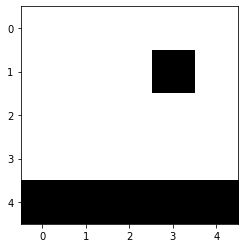

In [151]:
# a = np.array([[0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 1, 0], [0, 0, 0, 1, 0], [0, 0, 0, 1, 0]])
a = np.array([[0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 1, 0], [0, 0, 0, 1, 0], [0, 0, 0, 1, 0]])
dij = DijkSta(a)
path = dij((0, 0), (4, 4))
root = path
idx = 0
print(f'[0]  root: ({root.x}, {root.y})  parent_node: {root.parent_node}  pre_nodes: {root.pre_nodes}')
render_map = np.zeros((a.shape[0], a.shape[1], 3))
while root is not None and root.parent_node is not None:
    print(f'[idx]  root: ({root.x}, {root.y})')
    render_map[root.x, root.y, :] = 255
    idx += 1
    root = root.parent_node

render_map[a == 1, :] = (255, 0, 0)
# render_map = cv2.resize(render_map, (128, 128))
plt.imshow(render_map)

dij.show_mask_map()